In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Hough Transformation
## Q1 - HoughLines

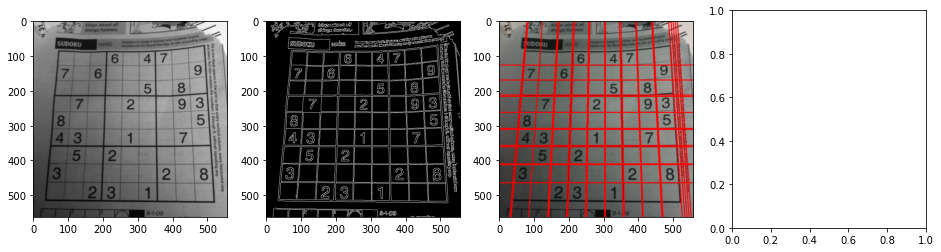

In [3]:
im = cv.imread('./assets/sudoku.png', cv.IMREAD_COLOR)
assert im is not None

gray = cv.cvtColor(im, cv.COLOR_BGR2GRAY)
edges = cv.Canny(gray, 20, 120, apertureSize=3)
lines = cv.HoughLines(edges, 1, np.pi/180, 200)

for line in lines:
  rho, theta = line[0]
  a = np.cos(theta)
  b = np.sin(theta)
  x0, y0 = a*rho, b*rho
  x1, y1 = int(x0 + 2000*(-b)), int(y0 + 2000*(a))
  x2, y2 = int(x0 - 2000*(-b)), int(y0 - 2000*(a))
  cv.line(im, (x1, y1), (x2, y2), (255,0,0), 2)

fig, ax = plt.subplots(1, 4, figsize=(16,4))

ax[0].imshow(gray, cmap=cm.gray)
ax[1].imshow(edges, cmap=cm.gray)
ax[2].imshow(im)

plt.show()

## Q2 - HoughCircles

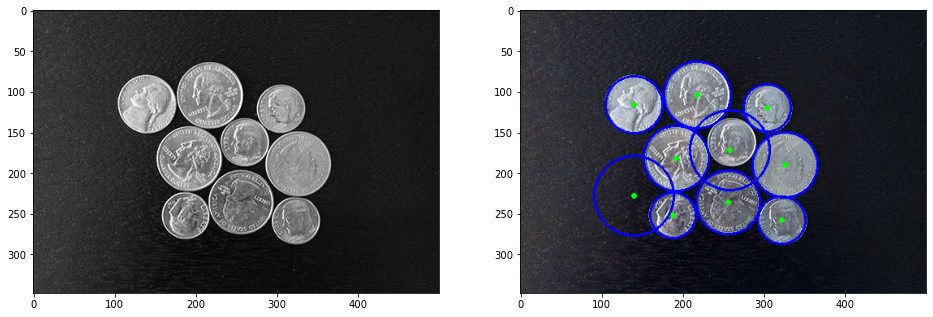

In [4]:
im = cv.imread('./assets/coins.jpg', cv.IMREAD_COLOR)
assert im is not None

gray = cv.cvtColor(im, cv.COLOR_BGR2GRAY)
circles = cv.HoughCircles(gray,cv.HOUGH_GRADIENT,1,50,param1=150,param2=20,minRadius=20,maxRadius=50)
circles = np.uint16(np.around(circles))
for i in circles[0, :]:
  cv.circle(im, (i[0], i[1]), i[2], (0,0,255), 2) # circumference of the circle
  cv.circle(im, (i[0], i[1]), 2, (0,255,0), 2) # center of the circle

fig, ax = plt.subplots(1, 2, figsize=(16,8))

ax[0].imshow(gray, cmap=cm.gray)
ax[1].imshow(im)

plt.show()

## Q3 - Generalized Hough Transform

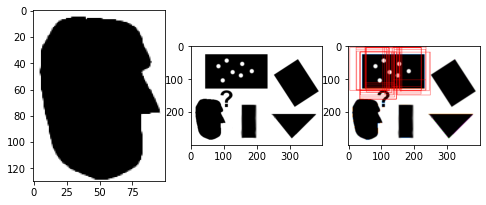

In [2]:
templ = cv.imread('./assets/templ.png', cv.IMREAD_GRAYSCALE)
im = cv.imread("./assets/pic1.png", cv.IMREAD_GRAYSCALE)
assert templ is not None
assert im is not None

im_edges = cv.Canny(im, 50, 50)
templ_edges = cv.Canny(templ, 50, 50)
alg = cv.createGeneralizedHoughGuil()
alg.setTemplate(templ_edges)
alg.setAngleThresh(100000)
alg.setScaleThresh(40000)
alg.setPosThresh(1000)
alg.setAngleStep(0.1)
alg.setMinScale(0.9)
alg.setMaxScale(1.1)

positions, votes = alg.detect(im_edges)

out = cv.cvtColor(im, cv.COLOR_BAYER_BG2BGR)
for x, y, scale, orientation in positions[0]:
  halfHeight = templ.shape[0]/2.*scale
  halfWidth = templ.shape[1]/2.*scale
  p1 = (int(x - halfWidth), int(y - halfHeight))
  p2 = (int(x + halfWidth), int(y + halfHeight))
  # print(f"x = {x}, y = {y}, scale = {scale}, orientation = {orientation}, p1 = {p1}, p2 = {p2}")
  cv.rectangle(out, p1, p2, (255,0,0))

fig, ax = plt.subplots(1,3,figsize=(8,4))

ax[0].imshow(templ, cmap=cm.gray)
ax[1].imshow(im, cmap=cm.gray)
ax[2].imshow(out, cmap=cm.gray)

plt.show()

# Alignment
## Q4 - 2D Transformations

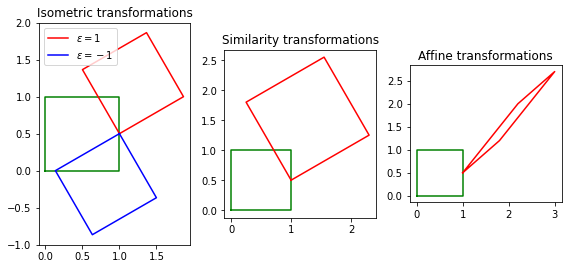

In [33]:
cos = np.cos
sin = np.sin

# Initial points
a, b, c, d = [0, 0, 1], [0, 1, 1], [1, 1, 1], [1, 0, 1]
X = np.array([a,b,c,d]).T


# Isometric transformations
ax[1].set_title("Isometries")
theta = np.pi*30/180
tx, ty = 1,0.5
epsilon_1 = 1
I_1 = np.array([[epsilon_1*cos(theta), -epsilon_1*sin(theta), tx], [epsilon_1*sin(theta),epsilon_1*cos(theta), ty], [0,0,1]])
epsilon_2 = -1
Y_1 = I_1 @ X
I_2 = np.array([[epsilon_2*cos(theta), -epsilon_2*sin(theta), tx], [epsilon_2*sin(theta),epsilon_2*cos(theta), ty], [0,0,1]])
Y_2 = I_2 @ X

# Similarity transformations
s = 1.5
S = np.array([[s*cos(theta), -s*sin(theta), tx], [s*sin(theta),s*cos(theta), ty], [0,0,1]])
Y_3 = S @ X

# Affine transformations
a11, a12, a21, a22 = 0.8, 1.2, 0.7, 1.5 # Must form a non-singular matrix
A = np.array([[a11, a12, tx], [a21, a22, ty], [0,0,1]])
Y_4 = A @ X

# Extract plotting values
x_0 = np.append(X[0,:], X[0,0])
y_0 = np.append(X[1,:], X[1,0])
x_1 = np.append(Y_1[0,:], Y_1[0,0])
y_1 = np.append(Y_1[1,:], Y_1[1,0])
x_2 = np.append(Y_2[0,:], Y_2[0,0])
y_2 = np.append(Y_2[1,:], Y_2[1,0])
x_3 = np.append(Y_3[0,:], Y_3[0,0])
y_3 = np.append(Y_3[1,:], Y_3[1,0])
x_4 = np.append(Y_4[0,:], Y_4[0,0])
y_4 = np.append(Y_4[1,:], Y_4[1,0])

# Plotting
fig, ax = plt.subplots(1,3, figsize=(8,8))

ax[0].set_title("Isometric transformations")
ax[0].plot(x_0, y_0, color='g')
ax[0].plot(x_1, y_1, color='r', label=f"$\epsilon={epsilon_1}$")
ax[0].plot(x_2, y_2, color='b', label=f"$\epsilon={epsilon_2}$")
ax[0].set_aspect('equal')
ax[0].legend()

ax[1].set_title("Similarity transformations")
ax[1].plot(x_0, y_0, color='g')
ax[1].plot(x_3, y_3, color='r')
ax[1].set_aspect('equal')

ax[2].set_title("Affine transformations")
ax[2].plot(x_0, y_0, color='g')
ax[2].plot(x_4, y_4, color='r')
ax[2].set_aspect('equal')

fig.tight_layout()

plt.show()

## Q5 - Warp Images

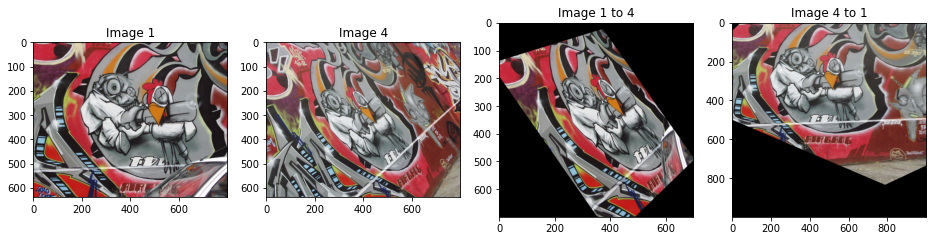

In [25]:
im1 = cv.imread(r'./assets/graf/img1.ppm', cv.IMREAD_ANYCOLOR)
im4 = cv.imread(r'./assets/graf/img4.ppm', cv.IMREAD_ANYCOLOR)
assert im1 is not None
assert im4 is not None

H = []
with open(r'./assets/graf/H1to4p') as f:
    H = np.array([[float(h) for h in line.split()] for line in f])

im1to4 = cv.warpPerspective(im1, H, (700, 700))
im4to1 = cv.warpPerspective(im4, np.linalg.inv(H), (1000, 1000))

fig, ax = plt.subplots(1,4,figsize=(16,4))
ax[0].imshow(cv.cvtColor(im1, cv.COLOR_BGR2RGB))
ax[0].set_title("Image 1")
ax[1].imshow(cv.cvtColor(im4, cv.COLOR_BGR2RGB))
ax[1].set_title("Image 4")
ax[2].imshow(cv.cvtColor(im1to4, cv.COLOR_BGR2RGB))
ax[2].set_title("Image 1 to 4")
ax[3].imshow(cv.cvtColor(im4to1, cv.COLOR_BGR2RGB))
ax[3].set_title("Image 4 to 1")

plt.show()